<a href="https://colab.research.google.com/github/ash200309/Iris-flower-clustering/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS Flower Clustering**
### Notebook by [Ansh Arora](https://www.linkedin.com/in/ansh-arora-1648a4226/)


### **Dataset Description**
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

## Importing Libraries and Dataset

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import DBSCAN

In [ ]:
df=pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# No. of rows and columns
df.shape

(150, 5)

In [ ]:
df.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()
# Dataset is balanced

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
# Checking duplicates
# Very less duplicates, no need to drop.

df.duplicated().sum()

3

## **EDA**

### Boxplot

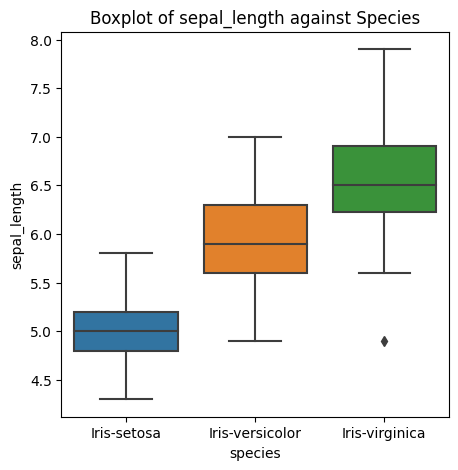

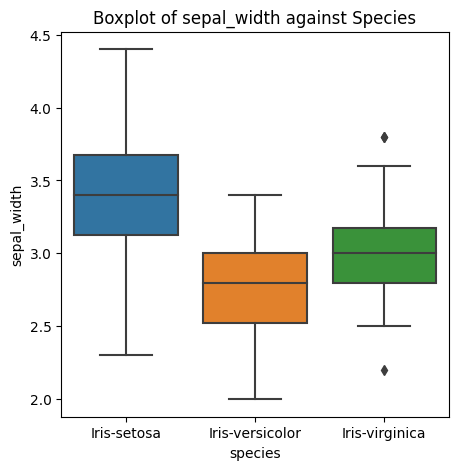

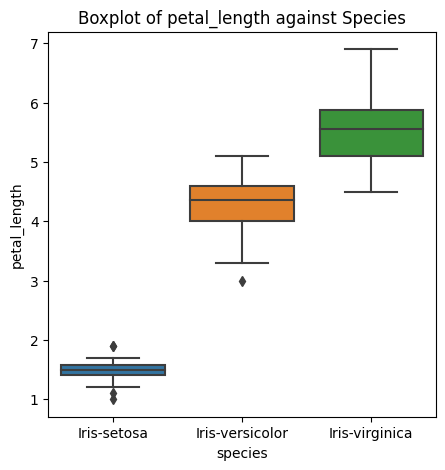

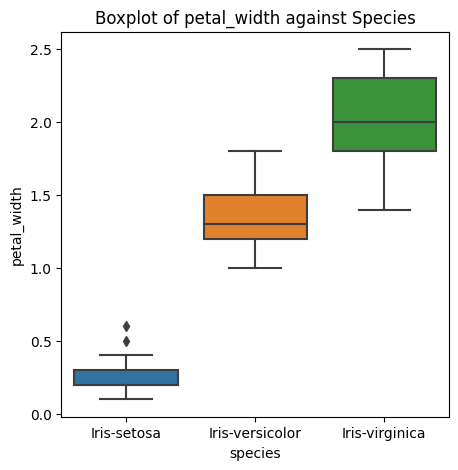

In [ ]:
columns=df.columns[0:4]
for column in columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x="species", y=column, data=df)
    plt.title(f'Boxplot of {column} against Species')
    plt.show()

#### Clearly, there's a differentiation in all the features other than sepal width.

### Pairplot

<Figure size 800x800 with 0 Axes>

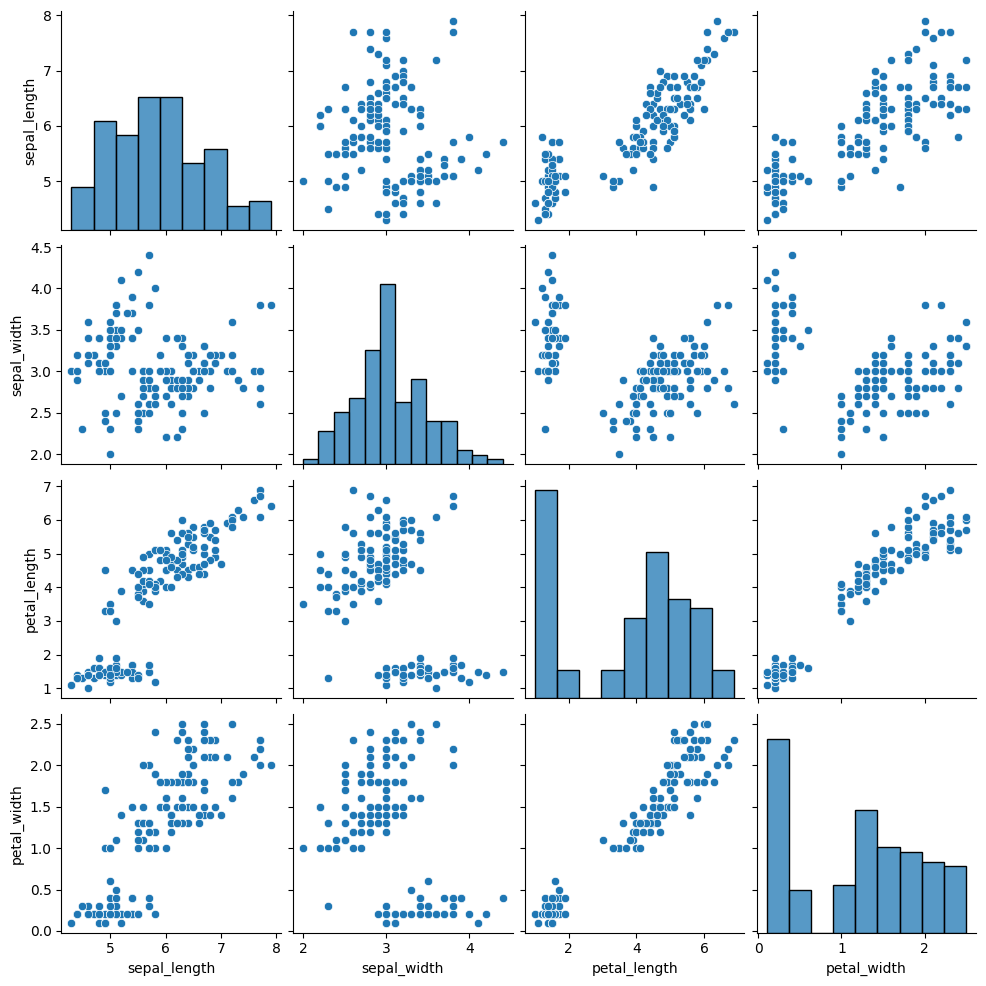

In [ ]:
data=df[["sepal_length","sepal_width","petal_length","petal_width"]]
plt.figure(figsize=(8, 8))
sns.pairplot(data)
plt.show()

#### Sepal Width shows the most irregular pattern, all the other features are mostly linear

## Unsupervised Learning

In [ ]:
x= df.iloc[:,0:4].values
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Visualizing and finding elbow point

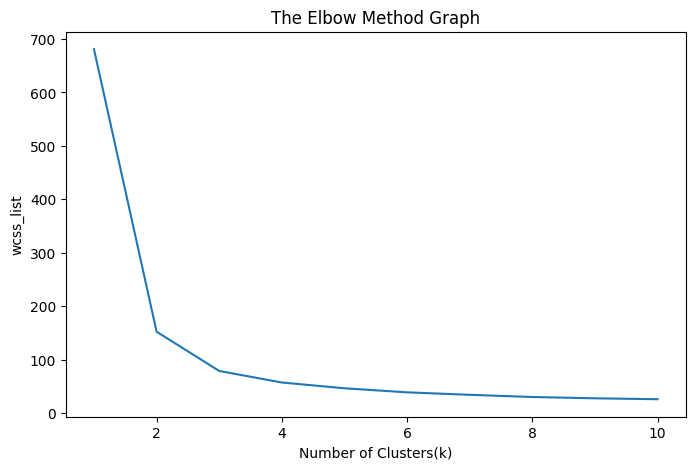

In [ ]:
wcc_list=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',n_init=10,random_state=1)
    kmeans.fit(x)
    wcc_list.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcc_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()


In [ ]:
kl=KneeLocator(range(1,11),wcc_list,curve='convex',direction='decreasing')
print('The Elbow point is: ',kl.elbow)

The Elbow point is:  3


### Fitting the model and predicting

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=1)
ypred=kmeans.fit_predict(x)
print('Predictions: ',ypred)

Predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Visualizing clusters

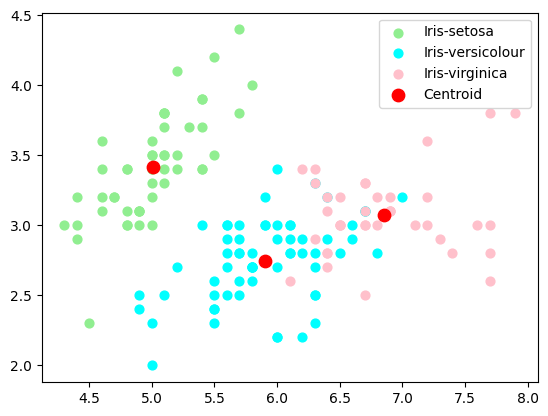

In [ ]:
plt.scatter(x[ypred==1,0],x[ypred==1,1],s=40,c='lightgreen',label='Iris-setosa')

plt.scatter(x[ypred==0,0],x[ypred==0,1],s=40,c='cyan',label='Iris-versicolour')

plt.scatter(x[ypred==2,0],x[ypred==2,1],s=40,c='pink',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=80,c='red',label='Centroid')
plt.legend()
plt.show()